In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


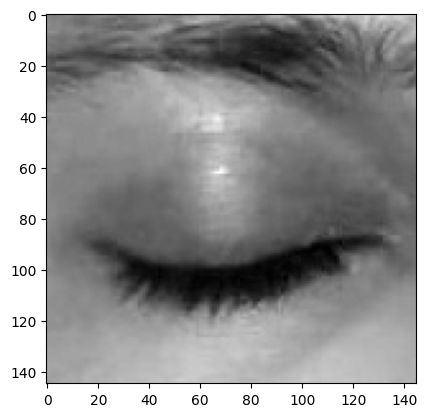

In [7]:
Datadirectory = "./"  ## training dataset
Classes = ["Closed", "Open"] ## list of classes
for category in Classes:
    path = os.path.join(Datadirectory, category)  ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

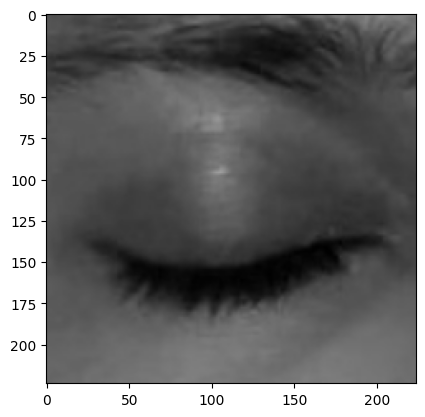

In [8]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

1452


In [12]:
import random

random.shuffle(training_Data)

In [13]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(1452, 224, 224, 3)

In [15]:
#normalize the data
X = X/255.0; ## we are normalizing it

In [16]:
Y = np.array(y)

In [17]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("x.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [22]:
base_input = model.layers[1].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [26]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [27]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [29]:
new_model.fit(X, Y, epochs=10, validation_split=0.1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9910 - loss: 0.0342 - val_accuracy: 0.9932 - val_loss: 0.0137
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9939 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 1.4565e-06
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9892 - loss: 0.0384 - val_accuracy: 0.9932 - val_loss: 0.0285
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9967 - loss: 0.0094 - val_accuracy: 0.9932 - val_loss: 0.0118
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.8940e-05
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9962 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 3.8822e-05
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 3.6514e-04
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 1.

In [30]:
new_model.save('drowsiness_model.h5')

In [ ]:
img_array = cv2.imread('s0012_08255_0_0_1_1_0_02.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X,_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input/X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

In [ ]:
img = cv2.imread('sad_women.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'harrcascade_frontalface_default.xml')

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x, y, w, h) in eyes:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascades_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x, y, w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes are not detected")
  else:
    for(ex, ey, ew, eh) in eyess:
      eyess_roi = roi_color[ey: ey+eh, ex:ex+ew]

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

In [ ]:
final_image.shape

In [ ]:
new_model.predict(final_image)

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascasdes + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpenend():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
  ret,frame = cap.read()
  eye_cascade = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  eyes = eye_cascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [ ]:
!pip install winsound

In [ ]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2

path = "haarscacade_frontalface_default.xml"
faceCascade = cv2.CascadeClassfier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot Open Webcam")
counter = 0
while True:
  ret, frame = cap.read()
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_eye_tree_eyeglasses.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  eyes = eye_cascade.detectMutliScale(gray,1.1,4)
  for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x: x+w]
    roi_color = frame[y:y+h, x: x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
      print("eyes are not detected")
    else:
      counter = counter + 1
      status = "Closed Eyes"
      cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
      if counter>5:
        x1, y1, w1, h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY-SIMPLEX, 0.7, (0,0,255), 2)
        winsound.Beep(frequency, duration)
        counter = 0

    cv2.imshow('Drowsiness Detection Tutorial',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from IPython.display import Audio

frequency = 2500
duration = 1

path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(path)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

counter = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in eyes:
        roi_gray = gray[y:y + h, x: x + w]
        roi_color = frame[y:y + h, x: x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)

        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            counter = counter + 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                            (0, 0, 255), 2)
                # Play a beep sound
                Audio(np.sin(2 * np.pi * np.arange(44100 * duration) * frequency / 44100), rate=44100, autoplay=True)

                counter = 0

    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
